# **Submitted By: Mrinal Bhan (DSAI : 211020428)**

**Task 1.** To implement a simple feed-forward neural network using keras library. The neural
network should have the following specifications:
1.   Input Layer: The input layer should match the dimension of your dataset.
2.   Hidden Layers: Include at least one hidden layer with a reasonable number of neurons.
3.   Output Layer: Design the output layer based on your chosen problem (classification or
regression).
Train the neural network on a dataset of your choice. You can use publicly available datasets
or create a synthetic dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense # For miscellaneous functions
from tensorflow.keras import utils # For datasets
from tensorflow.keras.datasets import mnist # For math functions and array
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading the MNIST dataset
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_X.shape)
print("Test labels shape: ", test_Y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [ ]:
features = train_X.shape[1]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Input layer with 28 neurons i.e number of features
     tf.keras.layers.Dense(16, activation='relu'),  #Hidden layer with 16 neurons
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y_categorical, epochs=10, validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.4947 - accuracy: 0.8561 - val_loss: 0.5123 - val_accuracy: 0.8556
Epoch 2/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4495 - accuracy: 0.8739 - val_loss: 0.4651 - val_accuracy: 0.8781
Epoch 3/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.4176 - accuracy: 0.8836 - val_loss: 0.4500 - val_accuracy: 0.8787
Epoch 4/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4083 - accuracy: 0.8846 - val_loss: 0.4768 - val_accuracy: 0.8817
Epoch 5/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8903 - val_loss: 0.3976 - val_accuracy: 0.8900
Epoch 6/10
1257/1257 [==============================] - 8s 6ms/step - loss: 0.3869 - accuracy: 0.8911 - val_loss: 0.4279 - val_accuracy: 0.8837
Epoch 7/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3782 - accuracy: 0.8950 - val_loss: 0.4204 - val_accuracy:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


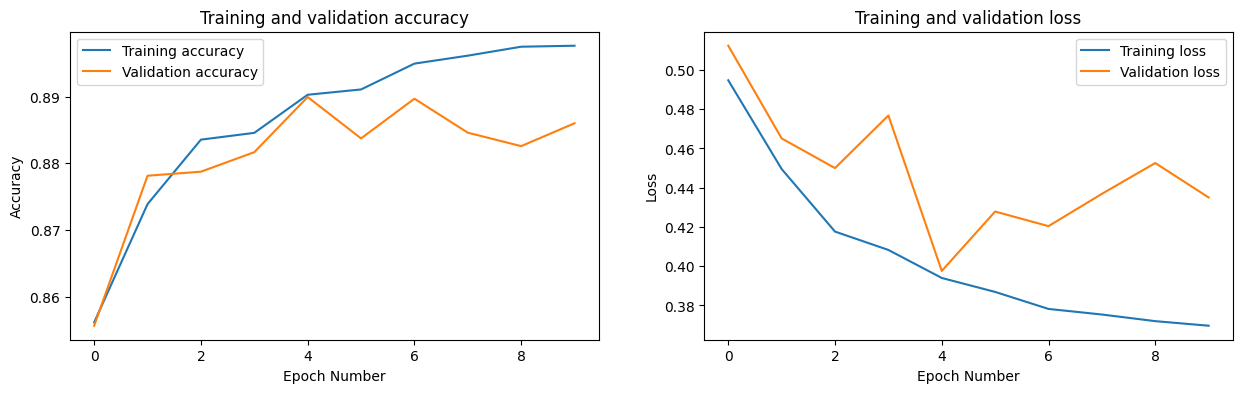

In [ ]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [ ]:
predict = model.predict(test_X[:1,:,:])
print('Predict shape: ', predict.shape)
print('Prediction for first test image: \n', predict[0])
print('Classification of the first test image: digit ', np.argmax(predict[0]))

1/1 [==============================] - 0s 61ms/step
Predict shape:  (1, 10)
Prediction for first test image: 
 [3.3607513e-08 1.1154112e-04 2.5045469e-02 6.1610201e-03 7.2616564e-07
 6.9169505e-06 4.3071849e-14 9.6867406e-01 1.9640513e-08 3.9236642e-08]
Classification of the first test image: digit  7


In [ ]:
train_loss, train_acc = model.evaluate(train_X,  train_Y_categorical)
test_loss, test_acc = model.evaluate(test_X,  test_Y_categorical)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8912
Classification accuracy on training set:  0.895716667175293
Classification accuracy on test set:  0.8912000060081482


In [ ]:
test_predict = model.predict(test_X)
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 953    0    2    0    2    1    9    5    8    0]
 [   0 1098    2    6    1    2    1    5   20    0]
 [  10    0  938    4    7    2   16    7   45    3]
 [   1    0   27  899    1   42    4    7   25    4]
 [   1    1    3    0  929    2   12    2    5   27]
 [  45    2    5  151   11  599   16    6   53    4]
 [  28    0    4    0   13    9  885    0   19    0]
 [   2    5   26   20    9    0    0  906    7   53]
 [  24    2   11   10   14   23   23   10  845   12]
 [   4    8    1   22   61    9    0   38    6  860]], shape=(10, 10), dtype=int32)


**Visualizing Hidden Layer Outputs**

In [ ]:
flat_layer = model.layers[0]
hidden_layer = model.layers[1]
output_layer = model.layers[2]

In [ ]:
def get_hidden_layer_output(model, X):
    # Convert X to a tensor
    x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                             dtype=tf.dtypes.float32)# Model layers
    flat_layer = model.layers[0]
    hidden_layer = model.layers[1]
    output_layer = model.layers[2]# Pass x through different layers
    flat_tensor = flat_layer(x)
    hidden_tensor = hidden_layer(flat_tensor)
    output_tensor = output_layer(hidden_tensor)
    predicted_digit = np.argmax(output_tensor)
    return hidden_tensor, predicted_digit

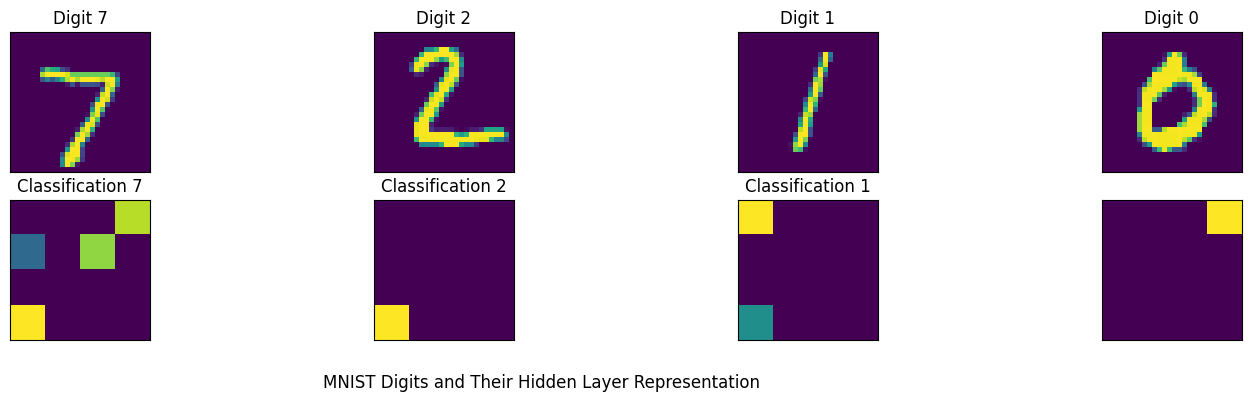

In [ ]:
total_cols = 4
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
    image = test_X[j, :, :]
    h, prediction = get_hidden_layer_output(model, image)
    ax[0, j].imshow(image)
    ax[1, j].imshow(np.reshape(h.numpy(), (4,4)))
    ax[0, j].set_title('Digit ' + str(test_Y[j]))
    ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)
plt.show()

**Task 2:** Implement dropout regularization within your previously created feed-forward NN. Experiment with different dropout rates and observe the effect on training and
validation accuracy/loss.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#Loading the MNIST dataset
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

In [ ]:
# Define different dropout rates to experiment with
dropout_rates = [0.0, 0.25, 0.5]

# Loop through different dropout rates and train the models
for rate in dropout_rates:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Training model with dropout rate: {rate}")
    history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y), verbose=2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=2)
    print(f"Test accuracy with dropout rate {rate}: {test_acc}")


Training model with dropout rate: 0.0
Epoch 1/10
1875/1875 - 6s - loss: 0.6348 - accuracy: 0.8100 - val_loss: 55.4354 - val_accuracy: 0.8757 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.3104 - accuracy: 0.9110 - val_loss: 54.4254 - val_accuracy: 0.8783 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.2802 - accuracy: 0.9195 - val_loss: 52.7971 - val_accuracy: 0.8875 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.2645 - accuracy: 0.9235 - val_loss: 55.5008 - val_accuracy: 0.8830 - 5s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 3s - loss: 0.2545 - accuracy: 0.9261 - val_loss: 55.1760 - val_accuracy: 0.8859 - 3s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.2466 - accuracy: 0.9282 - val_loss: 59.4062 - val_accuracy: 0.8787 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2399 - accuracy: 0.9311 - val_loss: 53.8096 - val_accuracy: 0.8939 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2359 - accuracy: 0.9322 - val_loss: 60.9512 - val_a

In [ ]:
# Define different dropout rates to experiment with
dropout_rates = [0.4, 0.45, 0.55]

# Loop through different dropout rates and train the models
for rate in dropout_rates:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Training model with dropout rate: {rate}")
    history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y), verbose=2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=2)
    print(f"Test accuracy with dropout rate {rate}: {test_acc}")


Training model with dropout rate: 0.4
Epoch 1/10
1875/1875 - 6s - loss: 0.1917 - accuracy: 0.9442 - val_loss: 0.2357 - val_accuracy: 0.9346 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.1911 - accuracy: 0.9443 - val_loss: 0.2379 - val_accuracy: 0.9346 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.1905 - accuracy: 0.9450 - val_loss: 0.2380 - val_accuracy: 0.9322 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.1890 - accuracy: 0.9449 - val_loss: 0.2379 - val_accuracy: 0.9326 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.1886 - accuracy: 0.9455 - val_loss: 0.2394 - val_accuracy: 0.9339 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.1873 - accuracy: 0.9453 - val_loss: 0.2346 - val_accuracy: 0.9336 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.1860 - accuracy: 0.9454 - val_loss: 0.2411 - val_accuracy: 0.9322 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.1855 - accuracy: 0.9460 - val_loss: 0.2422 - val_accuracy:

**Task 3:** Modify your feed-forward neural network to include batch normalization layers after each hidden layer.  

1.   Train the network using the same dataset and track its performance.
2.   Compare the convergence speed and final accuracy/loss with and without batch normalization.




In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization

# Define the neural network architecture with batch normalization
def build_model_with_batch_norm():
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        BatchNormalization(),  # Batch normalization layer
        tf.keras.layers.Dense(64, activation='relu'),
        BatchNormalization(),  # Batch normalization layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Define the neural network architecture without batch normalization
def build_model_without_batch_norm():
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the models
def train_and_evaluate(model, train_X, train_Y, test_X, test_Y):
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y), verbose=2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=2)
    return history, test_loss, test_acc

# Train and evaluate models with and without batch normalization
model_with_bn = build_model_with_batch_norm()
history_with_bn, test_loss_with_bn, test_acc_with_bn = train_and_evaluate(model_with_bn, train_X, train_Y, test_X, test_Y)

model_without_bn = build_model_without_batch_norm()
history_without_bn, test_loss_without_bn, test_acc_without_bn = train_and_evaluate(model_without_bn, train_X, train_Y, test_X, test_Y)

# Compare convergence speed and final accuracy/loss
print("With Batch Normalization:")
print(f"Test accuracy: {test_acc_with_bn}")
print("Without Batch Normalization:")
print(f"Test accuracy: {test_acc_without_bn}")


Epoch 1/10
1875/1875 - 12s - loss: 0.2486 - accuracy: 0.9251 - val_loss: 0.1287 - val_accuracy: 0.9597 - 12s/epoch - 7ms/step
Epoch 2/10
1875/1875 - 9s - loss: 0.1238 - accuracy: 0.9621 - val_loss: 0.0978 - val_accuracy: 0.9700 - 9s/epoch - 5ms/step
Epoch 3/10
1875/1875 - 9s - loss: 0.0961 - accuracy: 0.9701 - val_loss: 0.0892 - val_accuracy: 0.9733 - 9s/epoch - 5ms/step
Epoch 4/10
1875/1875 - 8s - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0884 - val_accuracy: 0.9716 - 8s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 9s - loss: 0.0679 - accuracy: 0.9780 - val_loss: 0.0790 - val_accuracy: 0.9763 - 9s/epoch - 5ms/step
Epoch 6/10
1875/1875 - 9s - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0702 - val_accuracy: 0.9776 - 9s/epoch - 5ms/step
Epoch 7/10
1875/1875 - 9s - loss: 0.0509 - accuracy: 0.9833 - val_loss: 0.0655 - val_accuracy: 0.9784 - 9s/epoch - 5ms/step
Epoch 8/10
1875/1875 - 8s - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.0760 - val_accuracy: 0.9770 - 8s/epoch - 4ms/step
Epoch 

**Task 4:** Extend your neural network to include multiple activation functions.
Implement the following activation functions in your model:  
1.   Tanh
2.   Sigmoid
3.   ReLU (Rectified Linear Unit)
4.   Softmax

Experiment with different activation functions for different layers and document
the impact on training

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import tanh, sigmoid, relu, softmax
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define a function to create a model with different activation functions
def create_model(activation_1, activation_2):
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_1),
        Dense(64, activation=activation_2),
        Dense(10, activation=softmax)
    ])
    return model

# Define different activation functions to experiment with
activation_functions = [tanh, sigmoid, relu]

# Experiment with different combinations of activation functions
for activation_1 in activation_functions:
    for activation_2 in activation_functions:
        model = create_model(activation_1, activation_2)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        print(f"Training model with activation functions: {activation_1.__name__}, {activation_2.__name__}")
        history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)
        print("\n")

Training model with activation functions: tanh, tanh
Epoch 1/5
1875/1875 - 8s - loss: 0.2638 - accuracy: 0.9229 - val_loss: 0.1689 - val_accuracy: 0.9488 - 8s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.1205 - accuracy: 0.9646 - val_loss: 0.1030 - val_accuracy: 0.9672 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.0973 - val_accuracy: 0.9700 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0973 - val_accuracy: 0.9680 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 7s - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0907 - val_accuracy: 0.9720 - 7s/epoch - 4ms/step


Training model with activation functions: tanh, sigmoid
Epoch 1/5
1875/1875 - 8s - loss: 0.3329 - accuracy: 0.9119 - val_loss: 0.1553 - val_accuracy: 0.9547 - 8s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.1292 - accuracy: 0.9624 - val_loss: 0.1096 - val_accuracy: 0.9682 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 7s - l